In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import tensorflow as tf

In [3]:
X_data=np.linspace(0.0,10.0,1000000)
noise=np.random.randn(1000000)

In [4]:
y_data=X_data*.5 +5+noise

In [5]:
Xdf=pd.DataFrame(data=X_data,columns=['X_data'])
Ydf=pd.DataFrame(data=y_data,columns=['Y_data'])
my_data=pd.concat([Xdf,Ydf],axis=1)

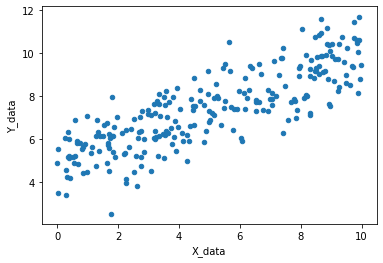

In [6]:
my_data.sample(n=250).plot(kind='scatter',x='X_data',y='Y_data')

In [7]:
np.random.randn(2)

array([-0.58929191,  0.21583917])

In [8]:
w=tf.Variable(1.34)
b=tf.Variable(-.411)
batch_size=8
xph=tf.placeholder(tf.float32,shape=[batch_size])
yph=tf.placeholder(tf.float32,shape=[batch_size])


In [9]:
y_model=xph*w + b
error=tf.square(yph-y_model)
optimizer=tf.train.GradientDescentOptimizer(learning_rate=.001)
train=optimizer.minimize(error)

In [10]:
init=tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    batches=1000
    for i in range(batches):
        rand=np.random.randint(len(X_data),size=[batch_size])
        feed={xph:X_data[rand],yph:y_data[rand]}
        sess.run(train,feed_dict=feed)
    neww,newb=sess.run([w,b])    
    

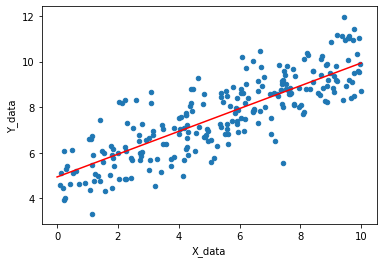

In [11]:
y_hat=X_data*neww + newb
my_data.sample(n=250).plot(kind='scatter',x='X_data',y='Y_data')
plt.plot(X_data,y_hat,'r')

# Estimator

In [12]:
feat_cols=[tf.feature_column.numeric_column('x',shape=[1])]
estimator=tf.estimator.LinearRegressor(feature_columns=feat_cols) 
from sklearn.model_selection import train_test_split

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/6k/t1p6b0wx63x0z9dsq32fp67r0000gn/T/tmpy_3hyayd', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0xb26c477b8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [13]:
x_train,x_eval,y_train,y_eval=train_test_split(X_data,y_data,test_size=.3,random_state=102)

In [14]:
x_train.shape

(700000,)

In [15]:
input_fn=tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=8,shuffle=True,num_epochs=None)
train_input_fn=tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=8,shuffle=False,num_epochs=1000)
eval_input_fn=tf.estimator.inputs.numpy_input_fn({'x':x_eval},y_eval,batch_size=8,shuffle=False,num_epochs=1000)

In [16]:
estimator.train(input_fn,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/6k/t1p6b0wx63x0z9dsq32fp67r0000gn/T/tmpy_3hyayd/model.ckpt.
INFO:tensorflow:loss = 395.42838, step = 1
INFO:tensorflow:global_step/sec: 1470.97
INFO:tensorflow:loss = 28.779364, step = 101 (0.069 sec)
INFO:tensorflow:global_step/sec: 2064.41
INFO:tensorflow:loss = 17.690142, step = 201 (0.049 sec)
INFO:tensorflow:global_step/sec: 2110.25
INFO:tensorflow:loss = 23.83796, step = 301 (0.048 sec)
INFO:tensorflow:global_step/sec: 2156.1
INFO:tensorflow:loss = 11.818642, step = 401 (0.045 sec)
INFO:tensorflow:global_step/sec: 2027.82
INFO:tensorflow:loss = 15.610289, step = 501 (0.049 sec)
INFO:tensorflow:global_step/sec: 1897.42
INFO:tensorflow:loss = 25.4799, step = 601 (0.053 sec)
INFO:tensorflow:g

In [17]:
train_metrics=estimator.evaluate(train_input_fn,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-08-12-17:19:19
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/6k/t1p6b0wx63x0z9dsq32fp67r0000gn/T/tmpy_3hyayd/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2019-08-12-17:19:19
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.0768049, global_step = 1000, label/mean = 7.5327616, loss = 8.614439, prediction/mean = 7.297959
INFO:tensorflow:Saving 'c

In [18]:
train_metrics

{'average_loss': 1.0768049,
 'label/mean': 7.5327616,
 'loss': 8.614439,
 'prediction/mean': 7.297959,
 'global_step': 1000}

In [19]:
eval_metrics=estimator.evaluate(eval_input_fn,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-08-12-17:20:02
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/6k/t1p6b0wx63x0z9dsq32fp67r0000gn/T/tmpy_3hyayd/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2019-08-12-17:20:03
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.0937865, global_step = 1000, label/mean = 7.5011177, loss = 8.750292, prediction/mean = 7.260867
INFO:tensorflow:Saving 'c

In [20]:
eval_metrics

{'average_loss': 1.0937865,
 'label/mean': 7.5011177,
 'loss': 8.750292,
 'prediction/mean': 7.260867,
 'global_step': 1000}

In [26]:
new_data=np.linspace(0,10,10)
input_fn_pred=tf.estimator.inputs.numpy_input_fn({'x':new_data},shuffle=False)
predictions=[]
for pred in estimator.predict(input_fn_pred):
    predictions.append(pred['predictions'])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/6k/t1p6b0wx63x0z9dsq32fp67r0000gn/T/tmpy_3hyayd/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [27]:
predictions

[array([4.4732676], dtype=float32),
 array([5.096055], dtype=float32),
 array([5.7188425], dtype=float32),
 array([6.3416295], dtype=float32),
 array([6.964417], dtype=float32),
 array([7.587204], dtype=float32),
 array([8.209991], dtype=float32),
 array([8.832779], dtype=float32),
 array([9.455566], dtype=float32),
 array([10.078354], dtype=float32)]

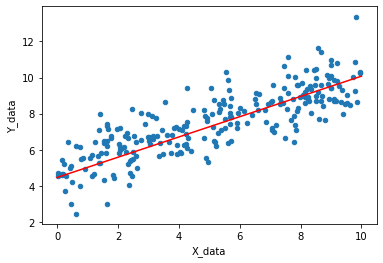

In [28]:
my_data.sample(n=250).plot(kind='scatter',x='X_data',y='Y_data')
plt.plot(new_data,predictions,'r')